In [1]:
import numpy as np
import matplotlib.pyplot as pp

import tensorflow as tf
from keras import layers

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
x_train = x_train/255
print(x_train[1].shape)
x_test = x_test/255
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)
print(y_train)

(28, 28)
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]], shape=(60000, 10), dtype=float32)


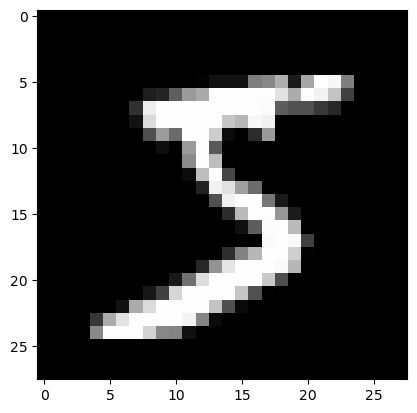

In [4]:
pp.imshow(x_train[0], cmap='gray')

In [14]:
model = tf.keras.models.Sequential([
    layers.Input(x_train.shape[1:]),
    layers.Flatten(),
    layers.Dense(200, activation='relu'),
    layers.Dense(200, activation='relu'),
    layers.Dense(200, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 200)               157000    
                                                                 
 dense_9 (Dense)             (None, 200)               40200     
                                                                 
 dense_10 (Dense)            (None, 200)               40200     
                                                                 
 dense_11 (Dense)            (None, 10)                2010      
                                                                 
Total params: 239,410
Trainable params: 239,410
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(x_train, y_train, epochs=150, batch_size=64, validation_split=0.2)

Epoch 1/150
750/750 [==============================] - 8s 8ms/step - loss: 0.2555 - accuracy: 0.9241 - val_loss: 0.1617 - val_accuracy: 0.9509
Epoch 2/150
750/750 [==============================] - 5s 7ms/step - loss: 0.1058 - accuracy: 0.9664 - val_loss: 0.0998 - val_accuracy: 0.9699
Epoch 3/150
750/750 [==============================] - 5s 7ms/step - loss: 0.0697 - accuracy: 0.9783 - val_loss: 0.0871 - val_accuracy: 0.9738
Epoch 4/150
750/750 [==============================] - 5s 7ms/step - loss: 0.0515 - accuracy: 0.9833 - val_loss: 0.0948 - val_accuracy: 0.9732
Epoch 5/150
750/750 [==============================] - 6s 8ms/step - loss: 0.0421 - accuracy: 0.9863 - val_loss: 0.0981 - val_accuracy: 0.9725
Epoch 6/150
750/750 [==============================] - 5s 7ms/step - loss: 0.0327 - accuracy: 0.9892 - val_loss: 0.0881 - val_accuracy: 0.9754
Epoch 7/150
750/750 [==============================] - 5s 6ms/step - loss: 0.0312 - accuracy: 0.9897 - val_loss: 0.0944 - val_accuracy: 0.9738

In [16]:

model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2245 - accuracy: 0.9839


[0.22452351450920105, 0.9839000105857849]

In [8]:

from PIL import Image, ImageChops
import PIL.ImageOps
import os

1/1 [==============================] - 0s 122ms/step


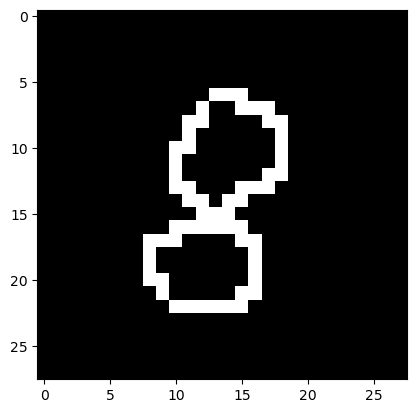

It's a:  8
1/1 [==============================] - 0s 39ms/step


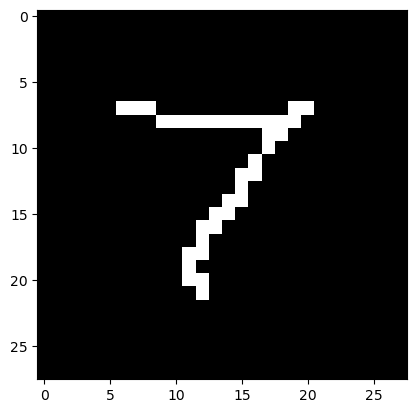

It's a:  7
1/1 [==============================] - 0s 31ms/step


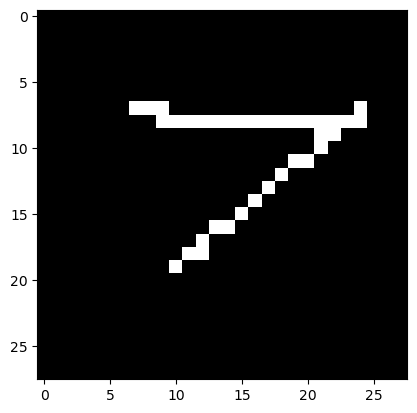

It's a:  3
1/1 [==============================] - 0s 39ms/step


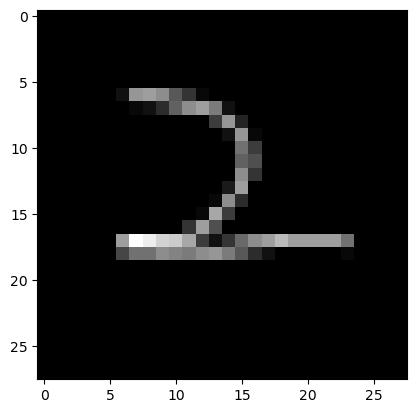

It's a:  2
1/1 [==============================] - 0s 36ms/step


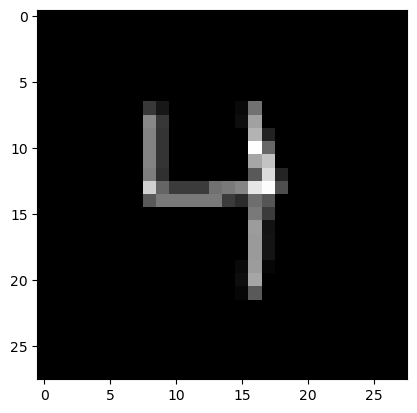

It's a:  4
1/1 [==============================] - 0s 34ms/step


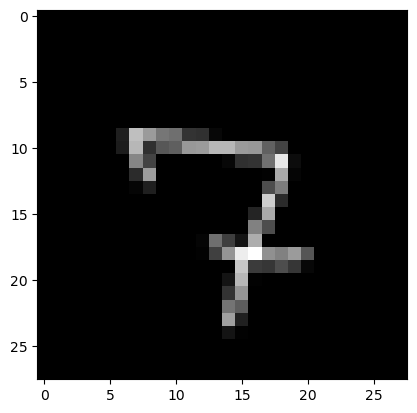

It's a:  7
1/1 [==============================] - 0s 35ms/step


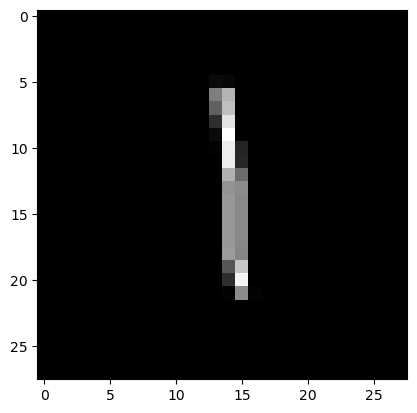

It's a:  1
1/1 [==============================] - 0s 44ms/step


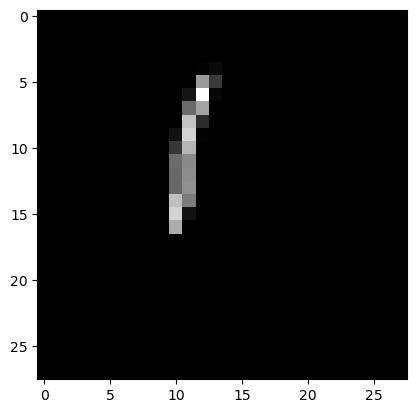

It's a:  4


In [18]:
images = []
for root, dirs, files in os.walk(os.getcwd()):
    for file in files:
        # check the extension of files
        if file.endswith('.png'):

            rgba_image = PIL.Image.open(file)
            rgba_image = rgba_image.resize((28, 28))
            rgb_image = rgba_image.convert('RGB')
            rgb_image = tf.keras.preprocessing.image.img_to_array(rgb_image)
            rgb_image = tf.image.rgb_to_grayscale(rgb_image)
            rgb_image = tf.squeeze(rgb_image)
            #print(rgb_image.shape)
            #pp.imshow(rgb_image, cmap='gray')
            #pp.show()
            images.append(rgb_image)
#print(len(images))
for i in range(len(images)):
    prediction = model.predict(np.array([images[i]]))
    pp.imshow(images[i], cmap='gray')
    pp.show()
    print("It's a: ", np.argmax(prediction))


In [17]:
model.save('big_brain3')

INFO:tensorflow:Assets written to: big_brain3\assets
